# Gaussian DCTR Fitting Ensembled over 120 Runs

In this notebook, we examine 120 seperate scans for fitting $\mu$ for a Gaussian distribution via the alternative DCTR fitting algorithm, each using a different DCTR reweighter. We compare the effectiveness of the loss and the AUC across all the scans.

In [1]:
# standard library imports
from __future__ import absolute_import, division, print_function

import numpy as np
from matplotlib import pyplot as plt

## Process Data

In [2]:
data_dir = '/global/cscratch1/sd/asuresh/data/GaussianFitting/'

In [3]:
thetas = np.linspace(0.9, 1.1, 21)

In [4]:
AUC = np.empty((0, len(thetas)))
val_AUC = np.empty((0, len(thetas)))
tot_AUC = np.empty((0, len(thetas)))
loss = np.empty((0, len(thetas)))
val_loss = np.empty((0, len(thetas)))

AUC_analytical = np.empty((0, len(thetas)))
val_AUC_analytical = np.empty((0, len(thetas)))
tot_AUC_analytical = np.empty((0, len(thetas)))
loss_analytical = np.empty((0, len(thetas)))
val_loss_analytical = np.empty((0, len(thetas)))

In [5]:
for i in range(120):
    file_label = data_dir +"AUCvsLossTrial{}.npz".format((i))
    file = np.load(file_label)

    AUC = np.append(AUC, np.expand_dims(file['AUC_T'], axis = 0), axis = 0)
    val_AUC = np.append(val_AUC, np.expand_dims(file['val_AUC_T'], axis = 0), axis = 0)
    tot_AUC = np.append(tot_AUC, np.expand_dims(file['tot_AUC_T'], axis = 0), axis = 0)
    loss = np.append(loss, np.expand_dims(file['lvals_T'], axis = 0), axis = 0)
    val_loss = np.append(val_loss, np.expand_dims(file['vlvals_T'], axis = 0), axis = 0)
    
    AUC_analytical = np.append(AUC_analytical, np.expand_dims(file['AUC_T_analytical'], axis = 0), axis = 0)
    val_AUC_analytical = np.append(val_AUC_analytical, np.expand_dims(file['val_AUC_T_analytical'], axis = 0), axis = 0)
    tot_AUC_analytical = np.append(tot_AUC_analytical, np.expand_dims(file['tot_AUC_T_analytical'], axis = 0), axis = 0)
    loss_analytical = np.append(loss_analytical, np.expand_dims(file['lvals_T_analytical'], axis = 0), axis = 0)
    val_loss_analytical = np.append(val_loss_analytical, np.expand_dims(file['vlvals_T_analytical'], axis = 0), axis = 0)

In [6]:
AUC_mean = np.mean(AUC, axis=0)
val_AUC_mean = np.mean(val_AUC, axis=0)
tot_AUC_mean = np.mean(tot_AUC, axis=0)
loss_mean = np.mean(loss, axis=0)
val_loss_mean = np.mean(val_loss, axis=0)

AUC_analytical_mean = np.mean(AUC_analytical, axis=0)
val_AUC_analytical_mean = np.mean(val_AUC_analytical, axis=0)
tot_AUC_analytical_mean = np.mean(tot_AUC_analytical, axis=0)
loss_analytical_mean = np.mean(loss_analytical, axis=0)
val_loss_analytical_mean = np.mean(val_loss_analytical, axis=0)

AUC_min = np.argmin(AUC, axis=1)
val_AUC_min = np.argmin(val_AUC, axis=1)
tot_AUC_min = np.argmin(tot_AUC, axis=1)
loss_max = np.argmax(loss, axis=1)
val_loss_max = np.argmax(val_loss, axis=1)

AUC_analytical_min = np.argmin(AUC_analytical, axis=1)
val_AUC_analytical_min = np.argmin(val_AUC_analytical, axis=1)
tot_AUC_analytical_min = np.argmin(tot_AUC_analytical, axis=1)
loss_analytical_max = np.argmax(loss_analytical, axis=1)
val_loss_analytical_max = np.argmax(val_loss_analytical, axis=1)

## Results

### DCTR Reweighting

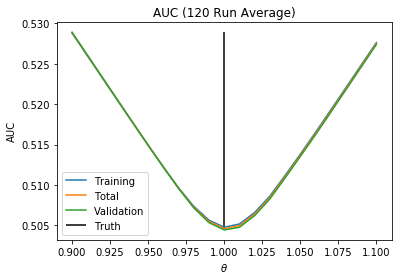

In [7]:
plt.title("AUC (120 Run Average)")

plt.plot(thetas, AUC_mean, label='Training')
plt.plot(thetas, tot_AUC_mean, label='Total')
plt.plot(thetas, val_AUC_mean, label='Validation')

plt.vlines(
    1,
    min(np.concatenate([AUC_mean, tot_AUC_mean, val_AUC_mean])),
    max(np.concatenate([AUC_mean, tot_AUC_mean, val_AUC_mean])),
    label='Truth')

plt.xlabel(r"$\theta$")
plt.ylabel("AUC")
plt.legend()
# plt.savefig("aLundEnsemble-Loss-120-Run-Average.png")
plt.show()

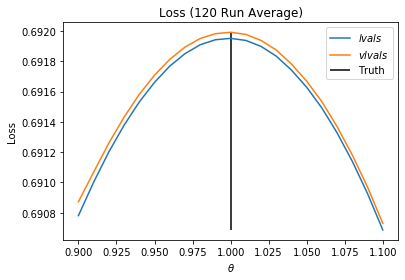

In [8]:
plt.title("Loss (120 Run Average)")

plt.plot(thetas, loss_mean, label='$lvals$')
plt.plot(thetas, val_loss_mean, label='$vlvals$')

plt.vlines(
    1,
    min(np.concatenate([loss_mean, val_loss_mean])),
    max(np.concatenate([loss_mean, val_loss_mean])),
    label='Truth')

plt.xlabel(r"$\theta$")
plt.ylabel("Loss")
plt.legend()
# plt.savefig("aLundEnsemble-Loss-120-Run-Average.png")
plt.show()

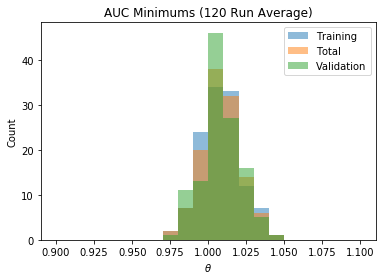

Training AUC Mean: 1.00317
Trainin AUC Standard Deviation: 0.01348

Total AUC Mean: 1.00350
Total AUC Standard Deviation: 0.01321

Validation AUC Mean: 1.00333
Validation AUC Standard Deviation: 0.01306


In [9]:
bins = np.linspace(0.9, 1.1, 21)
plt.title("AUC Minimums (120 Run Average)")

plt.hist(thetas[AUC_min], bins = bins, alpha = 0.5, label='Training')
plt.hist(thetas[tot_AUC_min], bins = bins, alpha = 0.5, label='Total')
plt.hist(thetas[val_AUC_min], bins = bins, alpha = 0.5, label='Validation')
plt.xlabel(r"$\theta$")
plt.ylabel("Count")

plt.legend()
# plt.savefig("aLundEnsemble-Loss-Maximums-120-Run-Average.png")
plt.show()

print("Training AUC Mean: {:.5f}".format(np.mean(thetas[AUC_min])))#, np.mean(thetas[AUC_6Obs_part_min]))
print("Trainin AUC Standard Deviation: {:.5f}\n".format(np.std(thetas[AUC_min])))

print("Total AUC Mean: {:.5f}".format(np.mean(thetas[tot_AUC_min])))#, np.mean(thetas[AUC_6Obs_part_min]))
print("Total AUC Standard Deviation: {:.5f}\n".format(np.std(thetas[tot_AUC_min])))

print("Validation AUC Mean: {:.5f}".format(np.mean(thetas[val_AUC_min])))
print("Validation AUC Standard Deviation: {:.5f}".format(np.std(thetas[val_AUC_min])))

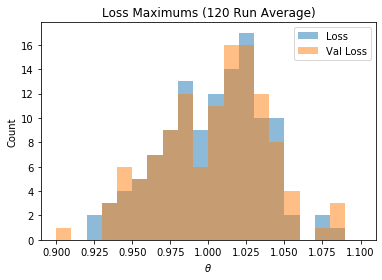

Loss Mean: 0.9978
Loss Standard Deviation: 0.0334

Validation Loss Mean: 0.9992
Validation Loss Standard Deviation: 0.0353


In [10]:
bins = np.linspace(0.9, 1.1, 21)
plt.title("Loss Maximums (120 Run Average)")

plt.hist(thetas[loss_max], bins = bins, alpha = 0.5, label='Loss')
plt.hist(thetas[val_loss_max], bins = bins, alpha = 0.5, label='Val Loss')
plt.xlabel(r"$\theta$")
plt.ylabel("Count")

plt.legend()
# plt.savefig("aLundEnsemble-Loss-Maximums-120-Run-Average.png")
plt.show()

print("Loss Mean: {:.4f}".format(np.mean(thetas[loss_max])))#, np.mean(thetas[AUC_6Obs_part_min]))
print("Loss Standard Deviation: {:.4f}\n".format(np.std(thetas[loss_max])))

print("Validation Loss Mean: {:.4f}".format(np.mean(thetas[val_loss_max])))
print("Validation Loss Standard Deviation: {:.4f}".format(np.std(thetas[val_loss_max])))

## Analytical Reweighting

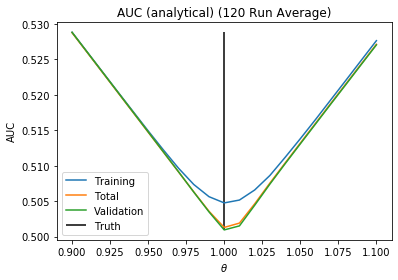

In [11]:
plt.title("AUC (analytical) (120 Run Average)")

plt.plot(thetas, AUC_mean, label='Training')
plt.plot(thetas, tot_AUC_analytical_mean, label='Total')
plt.plot(thetas, val_AUC_analytical_mean, label='Validation')

plt.vlines(
    1,
    min(np.concatenate([AUC_analytical_mean, tot_AUC_analytical_mean, val_AUC_analytical_mean])),
    max(np.concatenate([AUC_analytical_mean, tot_AUC_analytical_mean, val_AUC_analytical_mean])),
    label='Truth')

plt.xlabel(r"$\theta$")
plt.ylabel("AUC")
plt.legend()
# plt.savefig("aLundEnsemble-Loss-120-Run-Average.png")
plt.show()

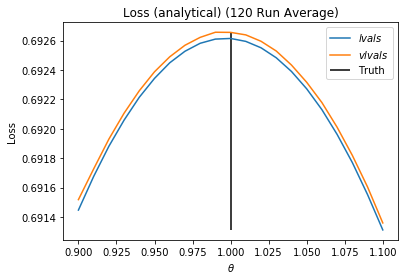

In [12]:
plt.title("Loss (analytical) (120 Run Average)")

plt.plot(thetas, loss_analytical_mean, label='$lvals$')
plt.plot(thetas, val_loss_analytical_mean, label='$vlvals$')

plt.vlines(
    1,
    min(np.concatenate([loss_analytical_mean, val_loss_analytical_mean])),
    max(np.concatenate([loss_analytical_mean, val_loss_analytical_mean])),
    label='Truth')

plt.xlabel(r"$\theta$")
plt.ylabel("Loss")
plt.legend()
# plt.savefig("aLundEnsemble-Loss-120-Run-Average.png")
plt.show()

While the average curve's maximum is somewhat close to truth, we see that the overall trend does not follow the concave down shape we expect for fitting; the loss should have a strictly decreasing trend as aLund moves away from Truth.

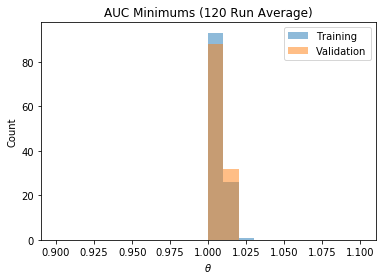

Training AUC Mean: 1.0023333333
Trainin AUC Standard Deviation: 0.004422166387140537/n
Validation AUC Mean: 1.0026666667
Validation AUC Standard Deviation: 0.0044221663871405375


In [13]:
bins = np.linspace(0.9, 1.1, 21)
plt.title("AUC Minimums (120 Run Average)")

plt.hist(thetas[AUC_analytical_min], bins = bins, alpha = 0.5, label='Training')
#plt.hist(thetas[tot_AUC_min], bins = bins, alpha = 0.5, label='Total')
plt.hist(thetas[val_AUC_analytical_min], bins = bins, alpha = 0.5, label='Validation')
plt.xlabel(r"$\theta$")
plt.ylabel("Count")

plt.legend()
# plt.savefig("aLundEnsemble-Loss-Maximums-120-Run-Average.png")
plt.show()

print("Training AUC Mean: {:.10f}".format(np.mean(thetas[AUC_analytical_min])))#, np.mean(thetas[AUC_6Obs_part_min]))
print("Trainin AUC Standard Deviation: {}/n".format(np.std(thetas[AUC_analytical_min])))

#print("Total AUC Mean: {:.5f}".format(np.mean(thetas[tot_AUC_min])))#, np.mean(thetas[AUC_6Obs_part_min]))
#print("Total AUC Standard Deviation: {:.5f}".format(np.std(thetas[tot_AUC_min])))

print("Validation AUC Mean: {:.10f}".format(np.mean(thetas[val_AUC_analytical_min])))
print("Validation AUC Standard Deviation: {}".format(np.std(thetas[val_AUC_analytical_min])))

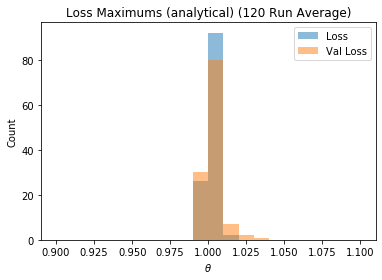

Loss Mean: 0.9980
Loss Standard Deviation: 0.004397/n
Validation Loss Mean: 0.9987
Validation Loss Standard Deviation: 0.006574


In [14]:
bins = np.linspace(0.9, 1.1, 21)
plt.title("Loss Maximums (analytical) (120 Run Average)")

plt.hist(thetas[loss_analytical_max], bins = bins, alpha = 0.5, label='Loss')
plt.hist(thetas[val_loss_analytical_max], bins = bins, alpha = 0.5, label='Val Loss')
plt.xlabel(r"$\theta$")
plt.ylabel("Count")

plt.legend()
# plt.savefig("aLundEnsemble-Loss-Maximums-120-Run-Average.png")
plt.show()

print("Loss Mean: {:.4f}".format(np.mean(thetas[loss_analytical_max])))#, np.mean(thetas[AUC_6Obs_part_min]))
print("Loss Standard Deviation: {:.6f}/n".format(np.std(thetas[loss_analytical_max])))

print("Validation Loss Mean: {:.4f}".format(np.mean(thetas[val_loss_analytical_max])))
print("Validation Loss Standard Deviation: {:.6f}".format(np.std(thetas[val_loss_analytical_max])))

## Individual Run Plots

We can see that the run to run variance for each curve is very large, illustrating that the fit is very specific to which DCTR rewighter we happen use.

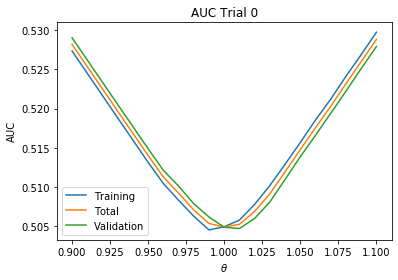

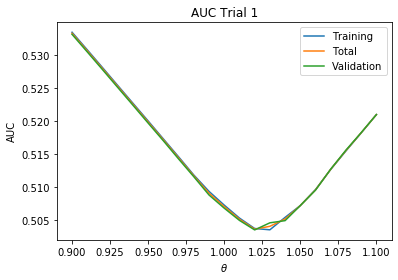

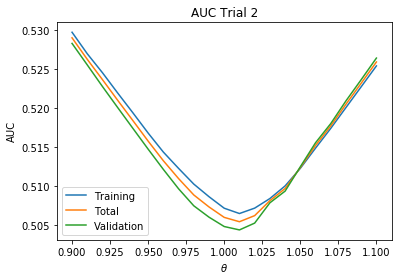

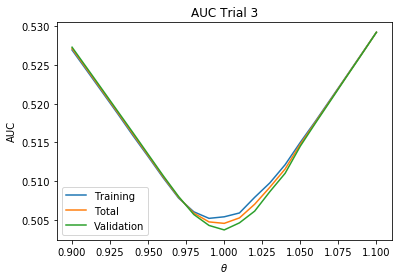

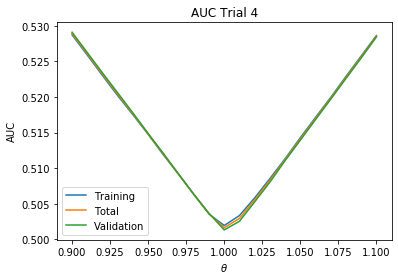

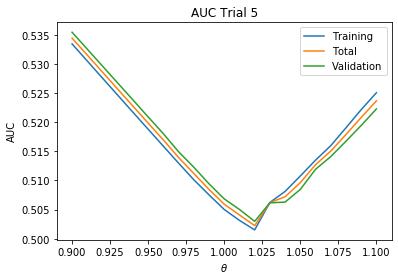

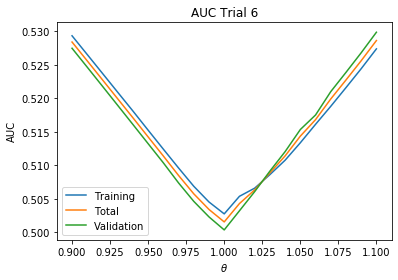

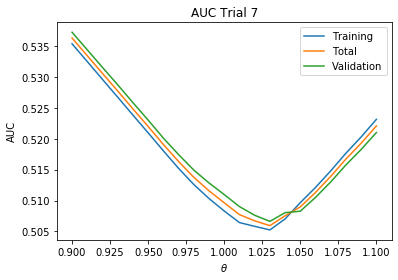

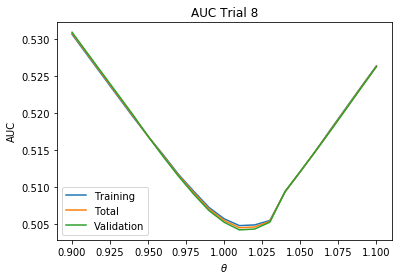

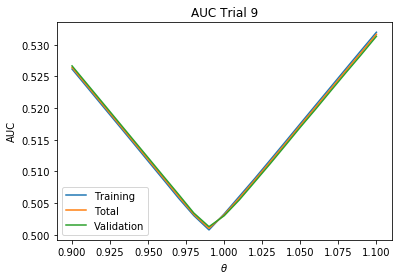

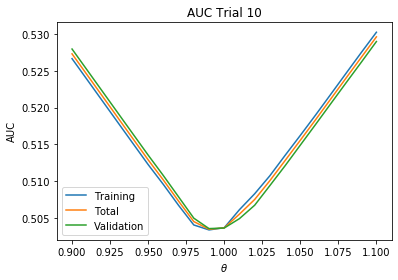

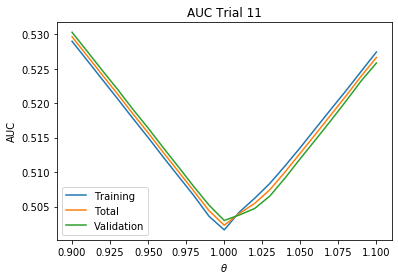

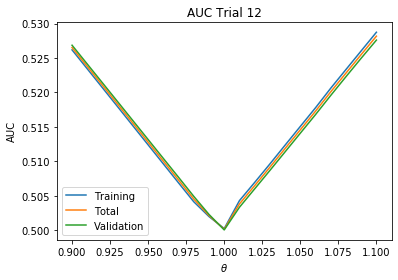

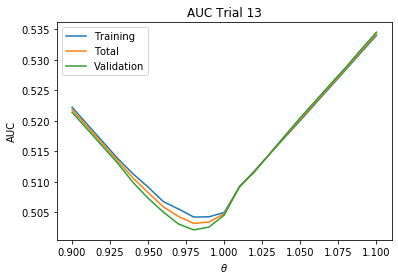

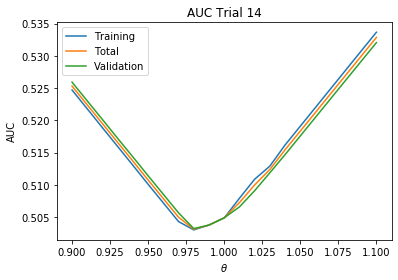

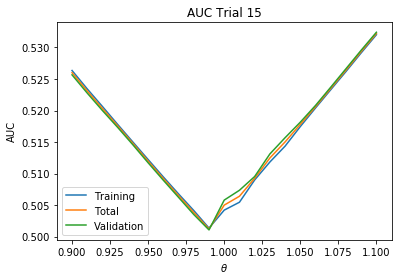

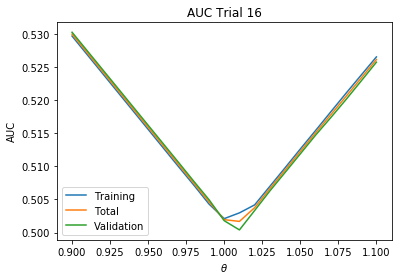

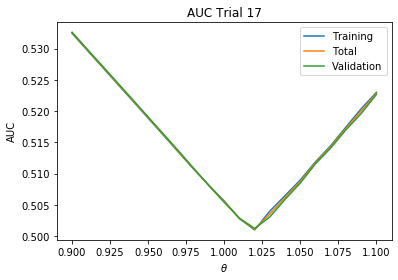

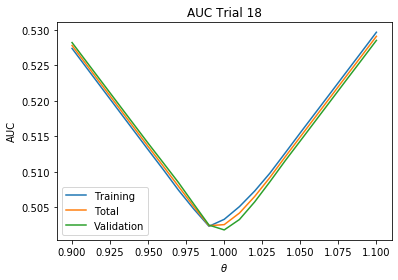

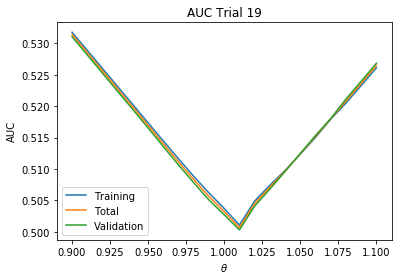

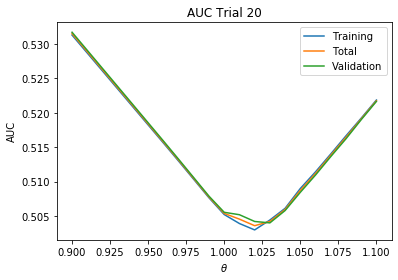

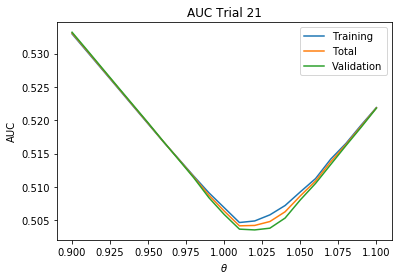

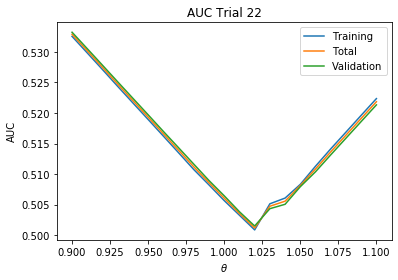

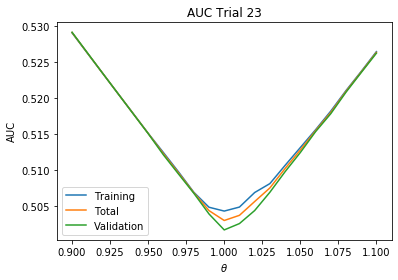

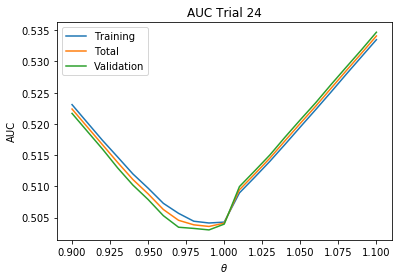

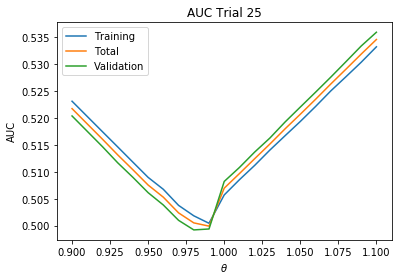

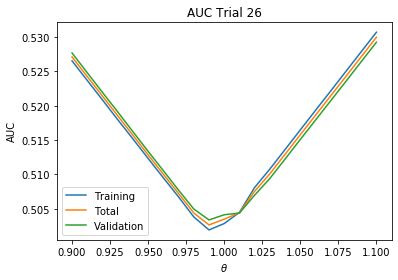

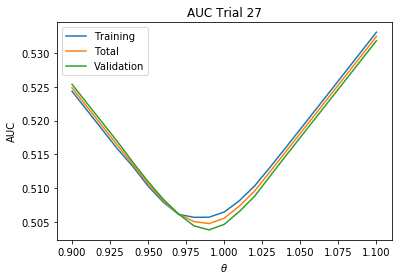

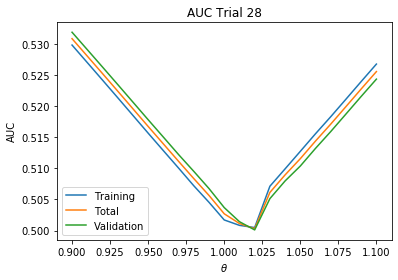

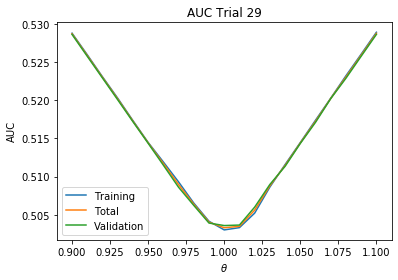

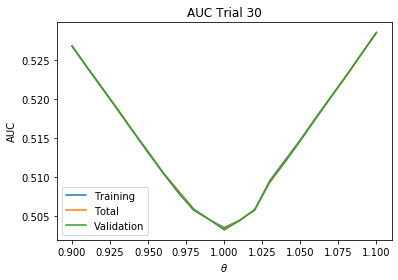

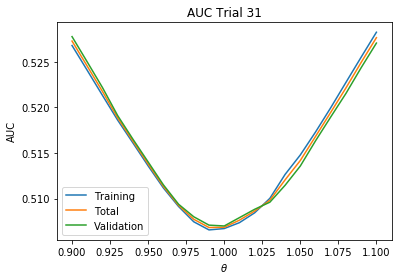

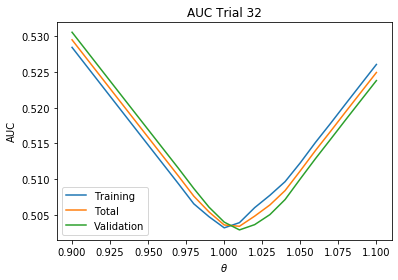

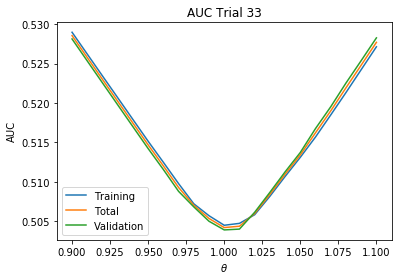

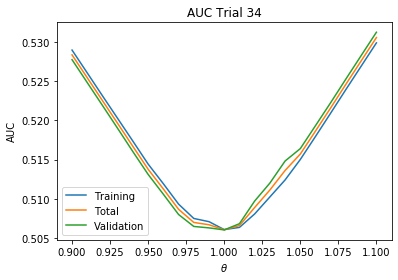

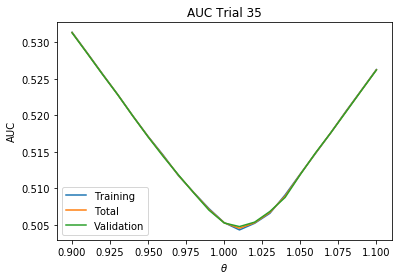

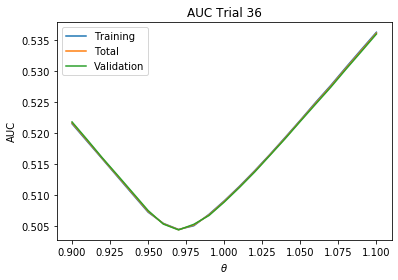

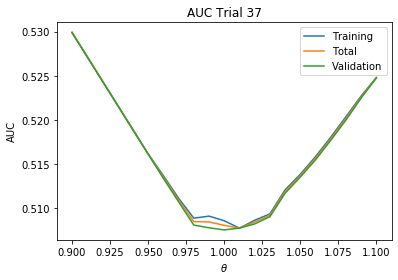

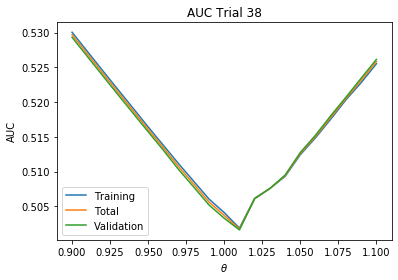

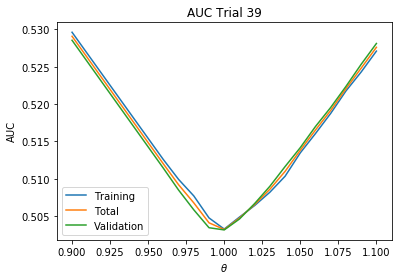

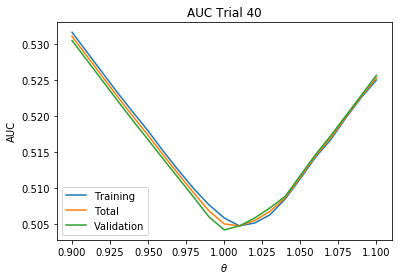

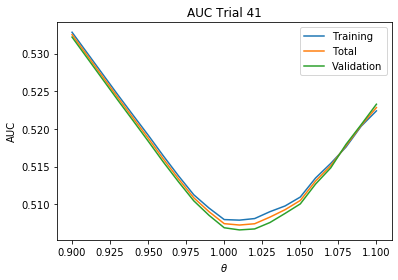

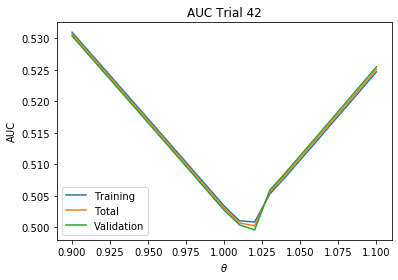

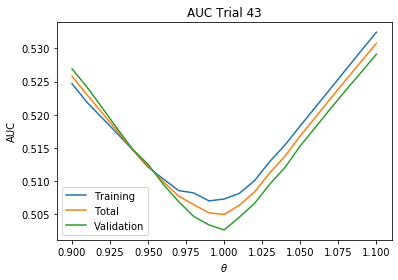

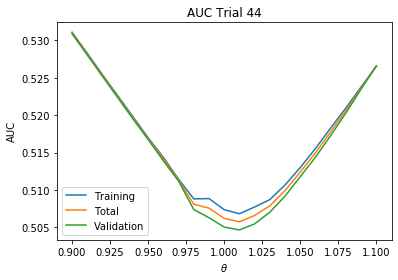

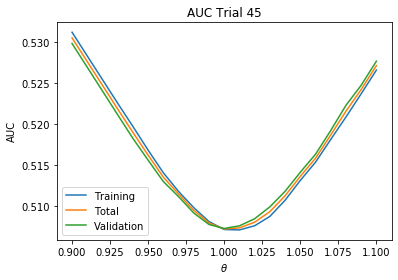

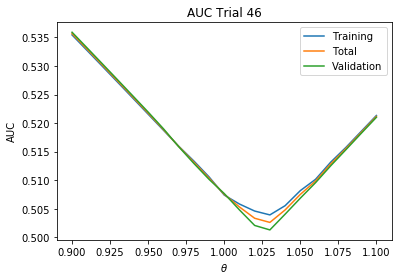

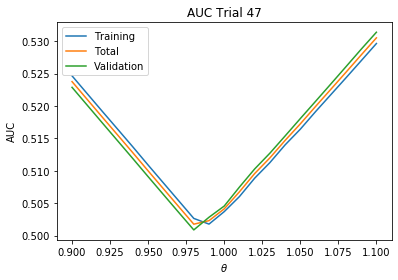

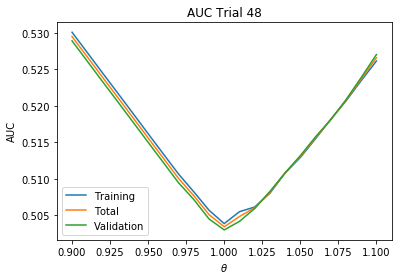

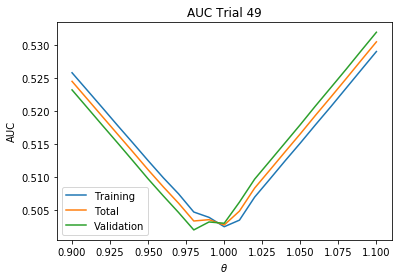

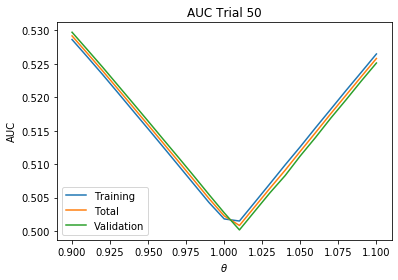

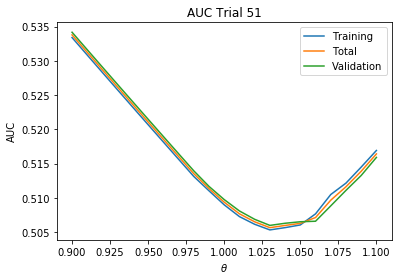

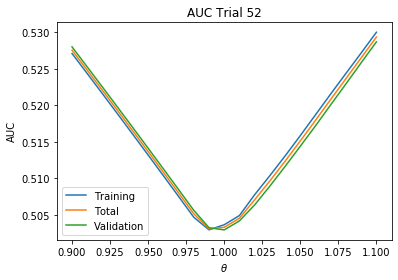

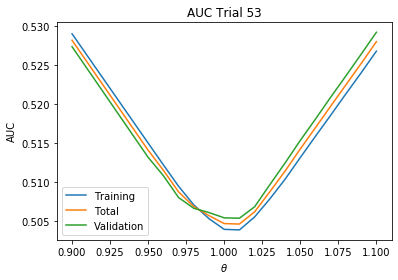

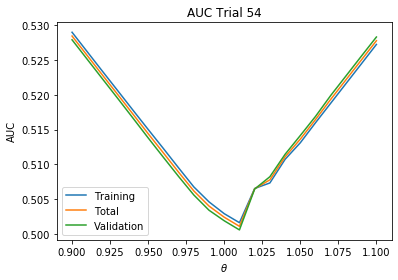

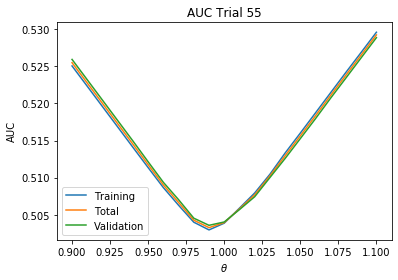

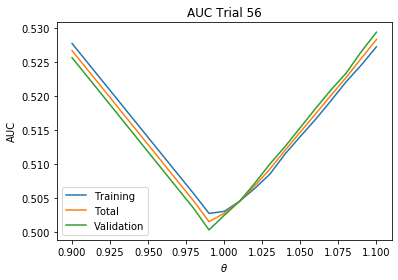

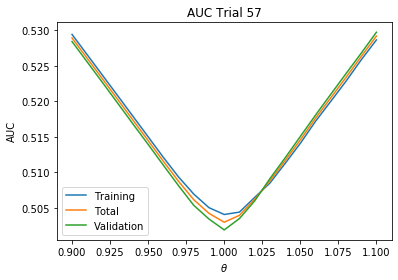

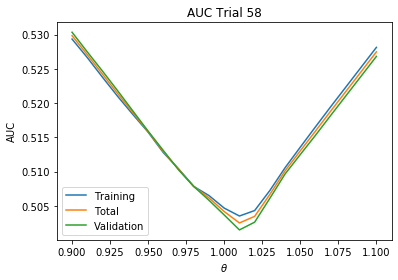

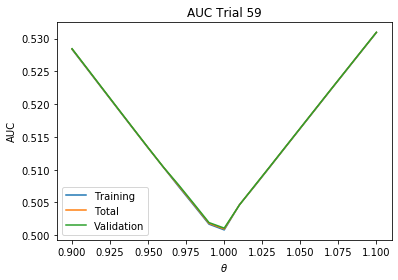

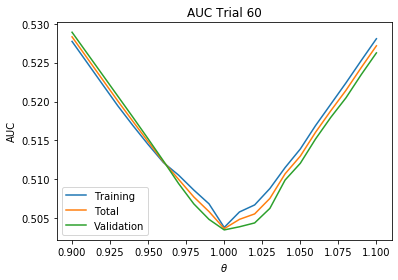

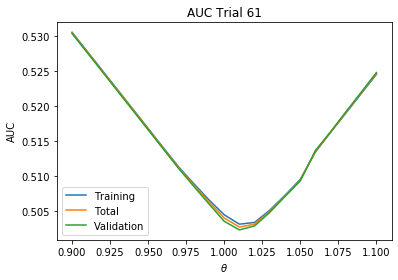

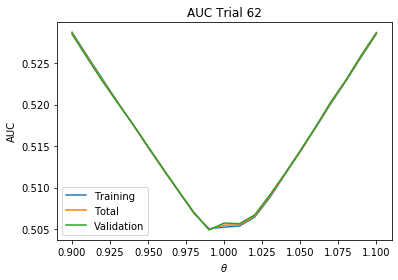

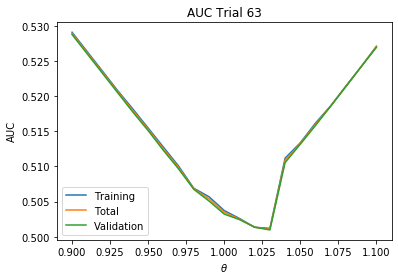

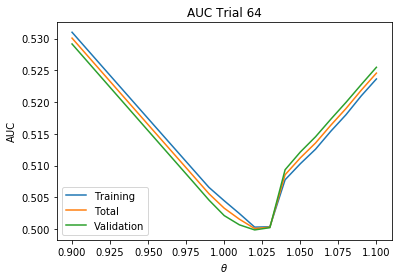

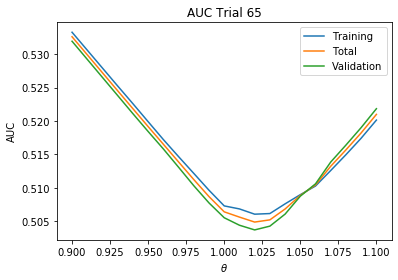

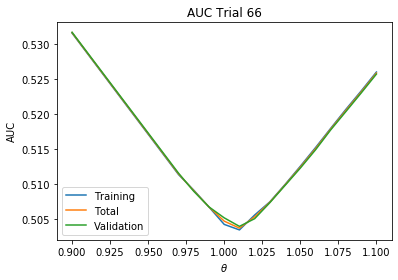

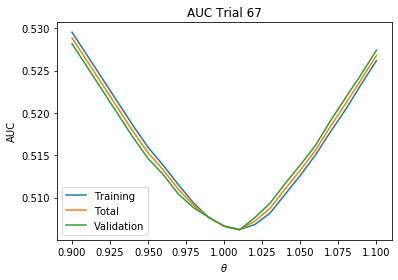

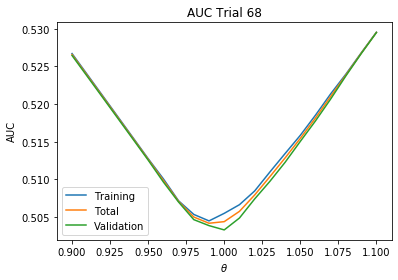

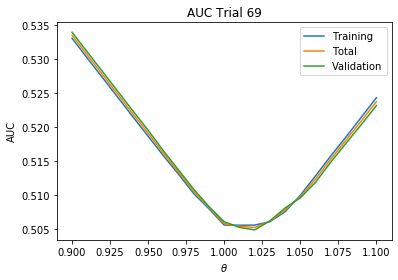

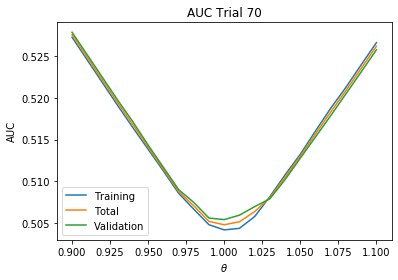

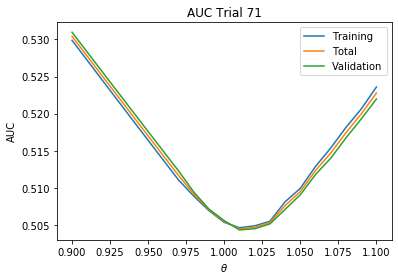

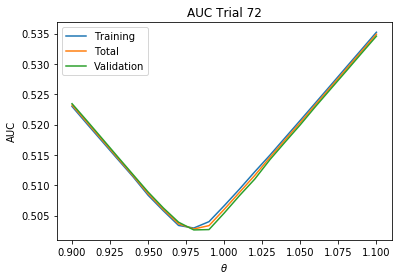

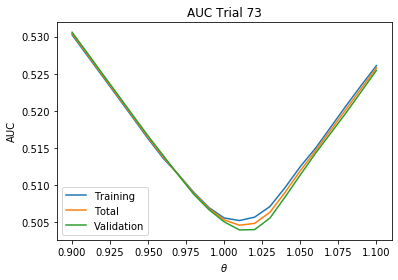

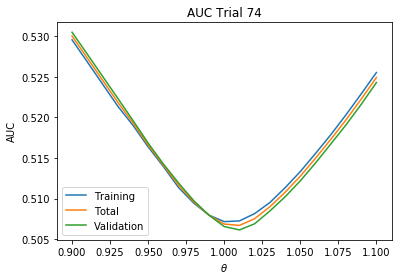

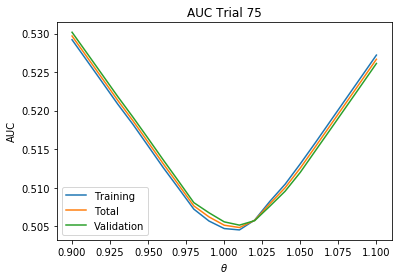

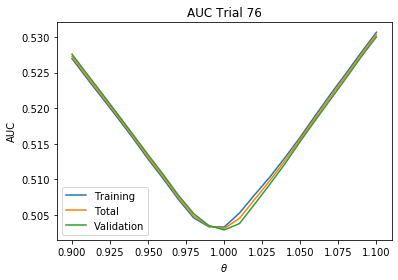

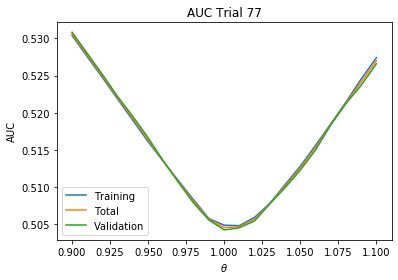

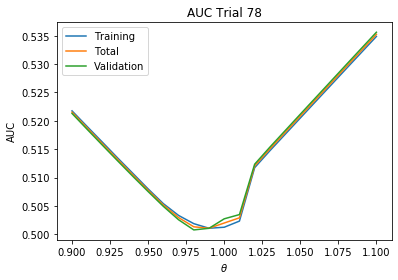

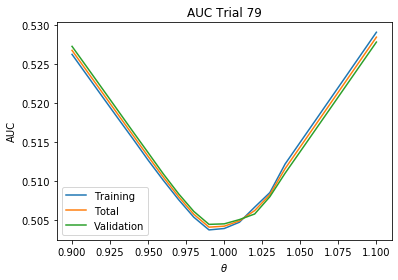

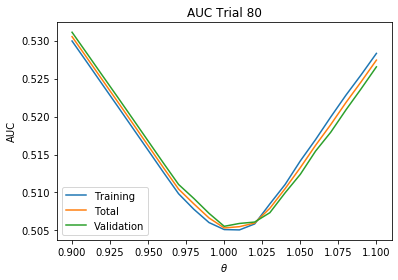

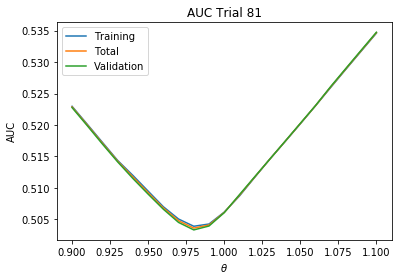

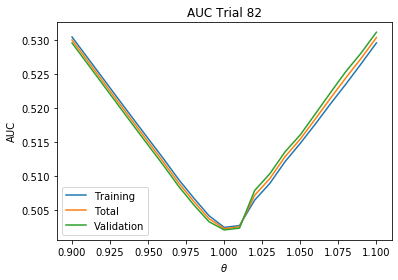

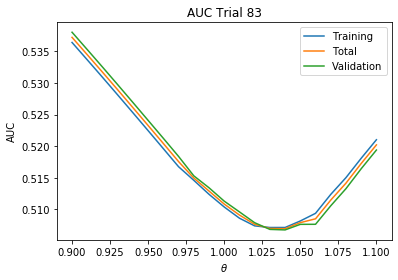

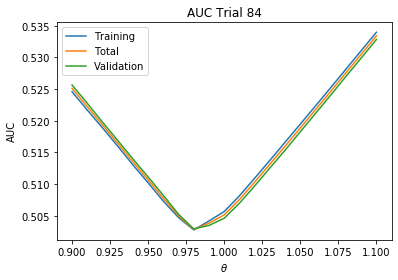

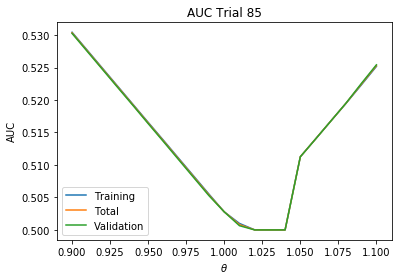

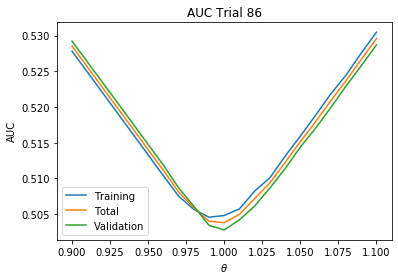

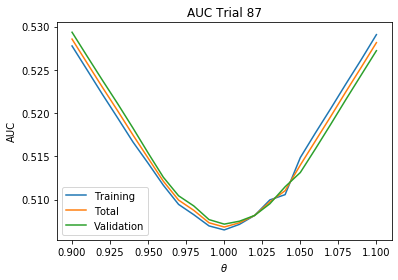

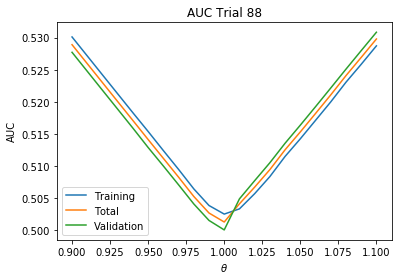

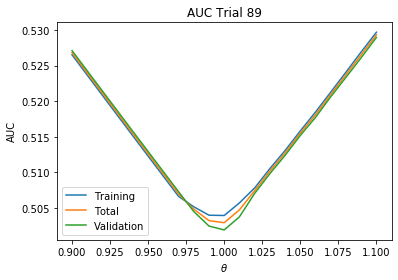

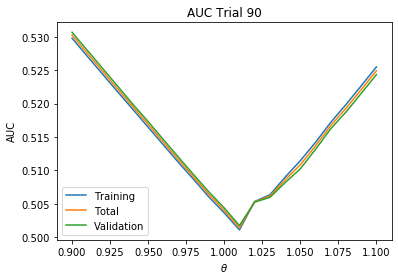

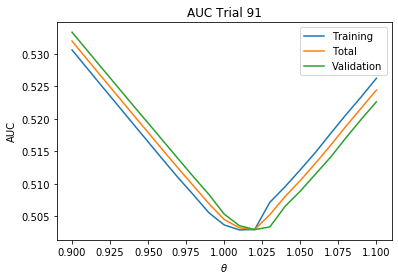

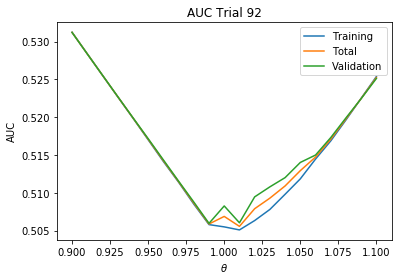

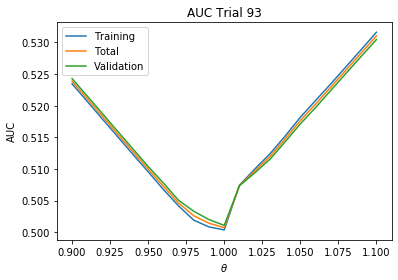

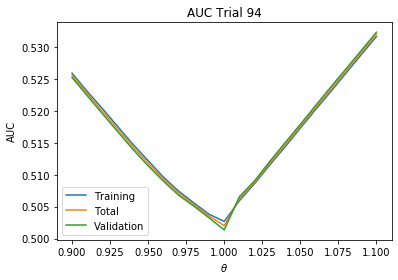

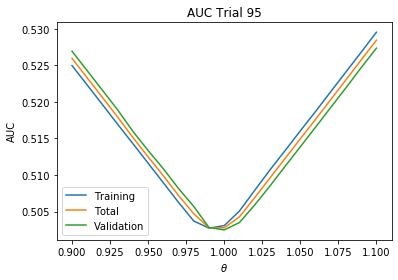

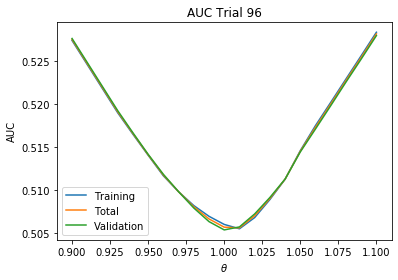

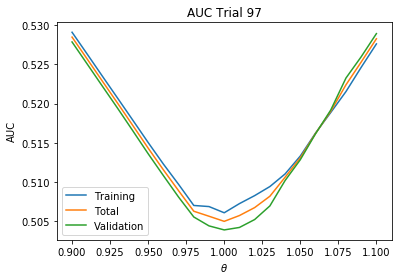

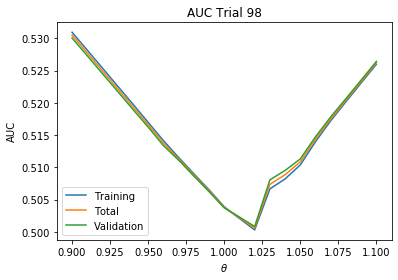

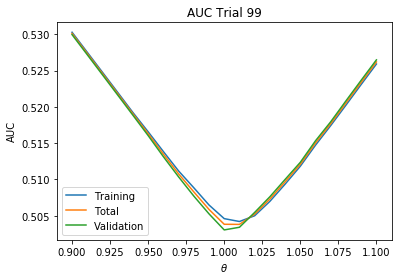

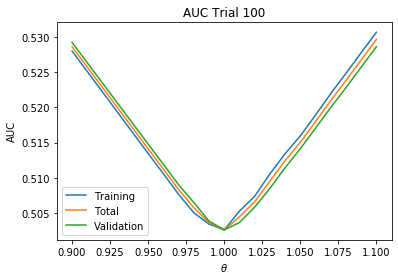

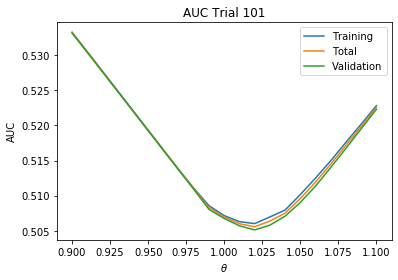

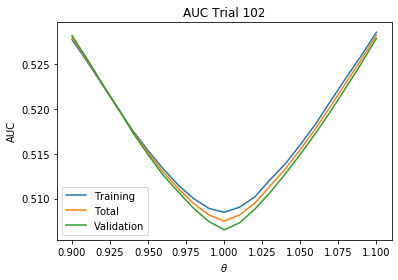

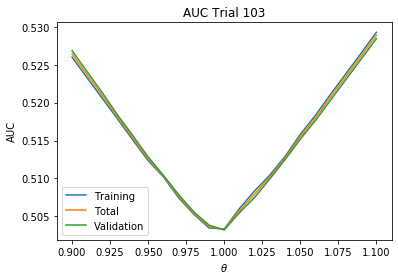

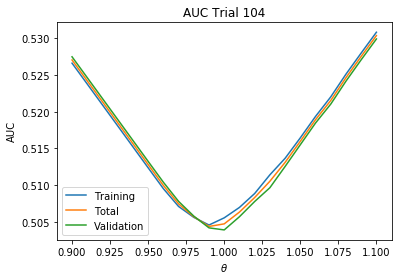

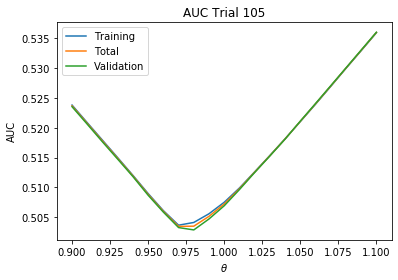

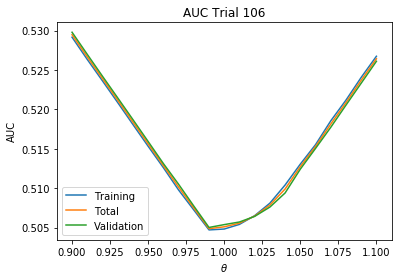

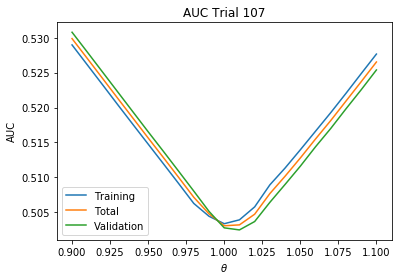

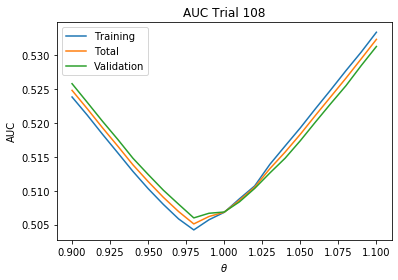

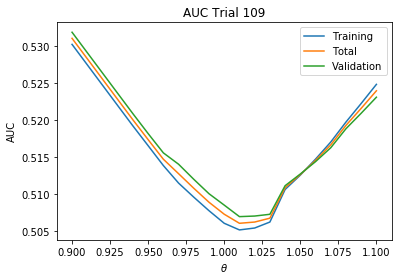

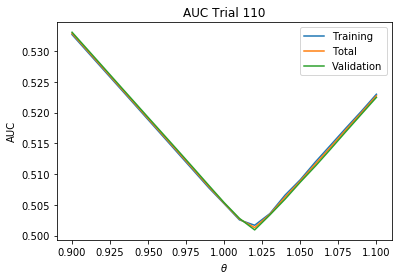

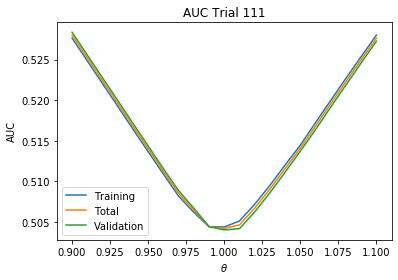

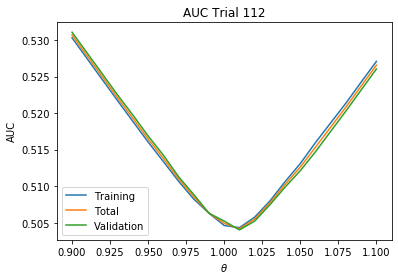

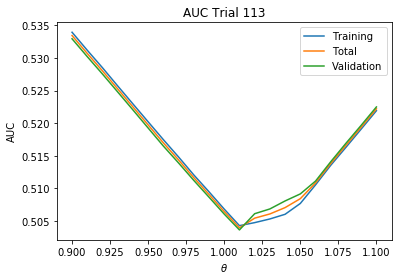

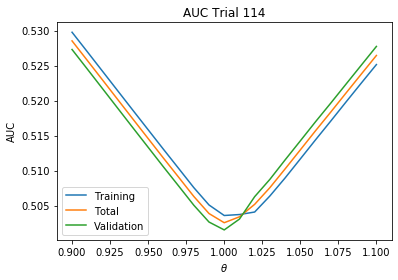

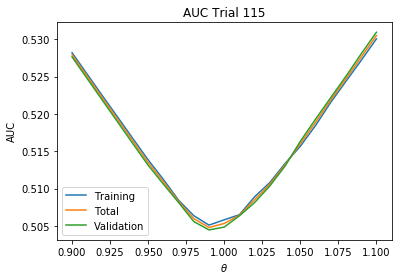

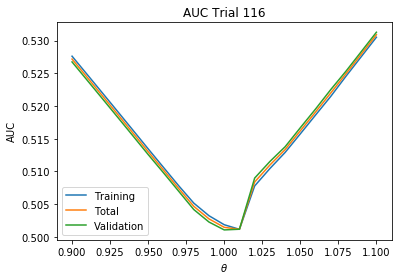

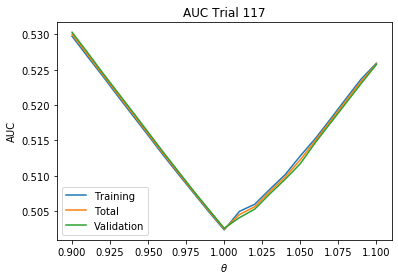

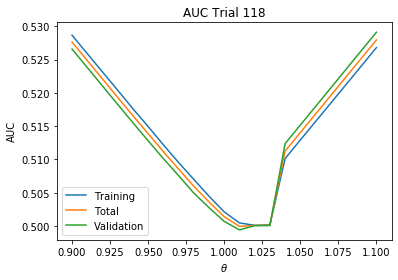

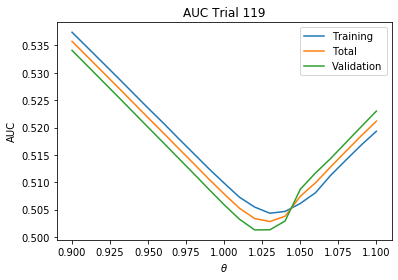

In [15]:
for index in range(120):
    plt.title("AUC Trial " + str(index))

    plt.plot(thetas, AUC[index], label='Training')
    plt.plot(thetas, tot_AUC[index], label='Total')
    plt.plot(thetas, val_AUC[index], label='Validation')

#    plt.vlines(
#        1,
#        min(np.concatenate([loss[index], val_loss[index]])),
#        max(np.concatenate([loss[index], val_loss[index]])),
#        label='Truth')

    plt.xlabel(r"$\theta$")
    plt.ylabel("AUC")
    plt.legend()
    #plt.savefig("aLundEnsemble-Loss-40-Run-Average.png")
    plt.show()